In [512]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [548]:
# df=pd.read_csv('house_price_prediction.csv')
df=pd.read_csv('logistic_regression.csv')

In [549]:
df.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [550]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [552]:
# df['date'] = pd.to_datetime(df['date'])
# df['year'] = df['date'].dt.year
# df=df.drop(columns=['date','waterfront','view','year'])

In [553]:
numeric_cols=df.select_dtypes(include=[np.number])

In [554]:
non_numeric_cols=df.select_dtypes(exclude=[np.number])

In [555]:
non_numeric_cols

,Gender
0,Male
1,Male
2,Female
3,Female
4,Male
...,...
395,Female
396,Male
397,Female
398,Male


In [556]:
# df['price']=df['price'].astype(int)

In [557]:
df=df.drop(columns=non_numeric_cols)

In [558]:
df.head()

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0


<Axes: >

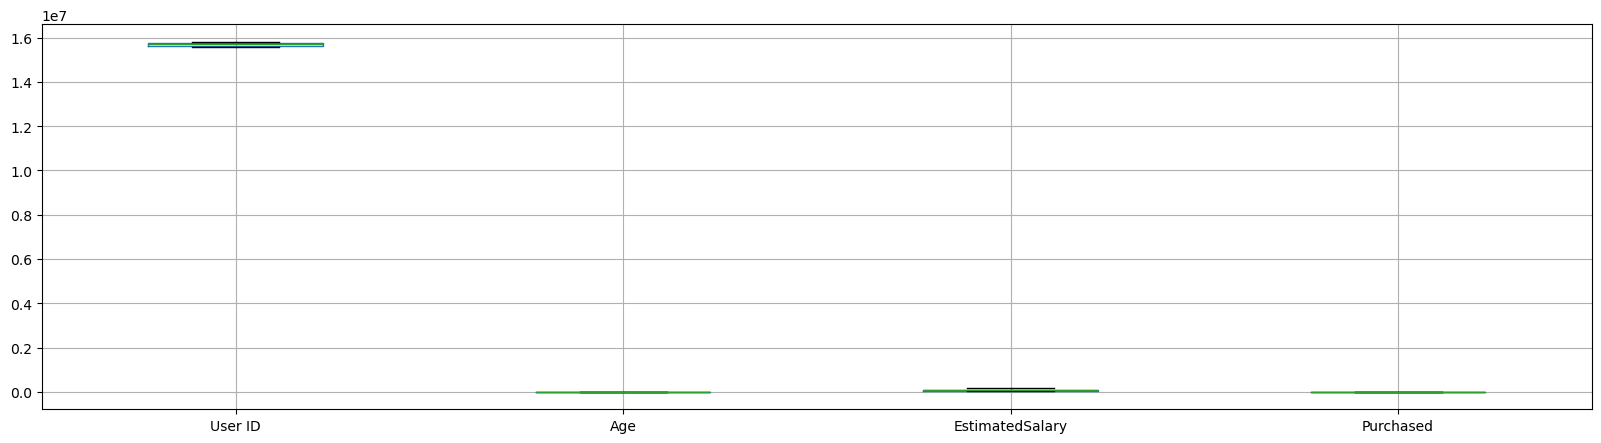

In [559]:
plt.figure(figsize=(20,5))
df.boxplot()

In [560]:
q3=df.quantile(0.75)

In [561]:
q1=df.quantile(0.25)

In [562]:
iqr=q3-q1

In [563]:
df=df[~((df<(q1-1.5*iqr))|(df>(q3+1.5*iqr)))]

In [564]:
df.head()

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0


<Axes: >

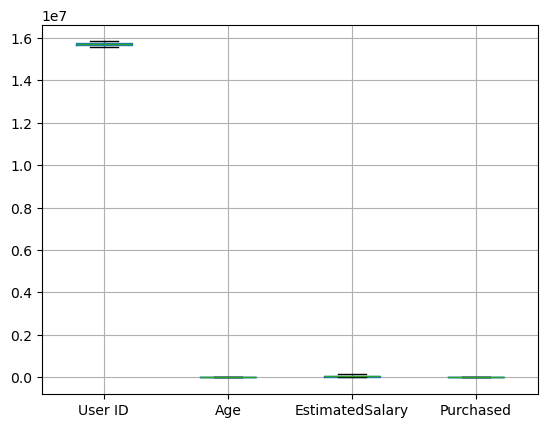

In [565]:
df.boxplot()

In [566]:
df.isnull().sum()

User ID            0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [567]:
# df.fillna(df.mean(),inplace=True)
df=df.dropna()

In [568]:
df.isnull().sum()

User ID            0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: >

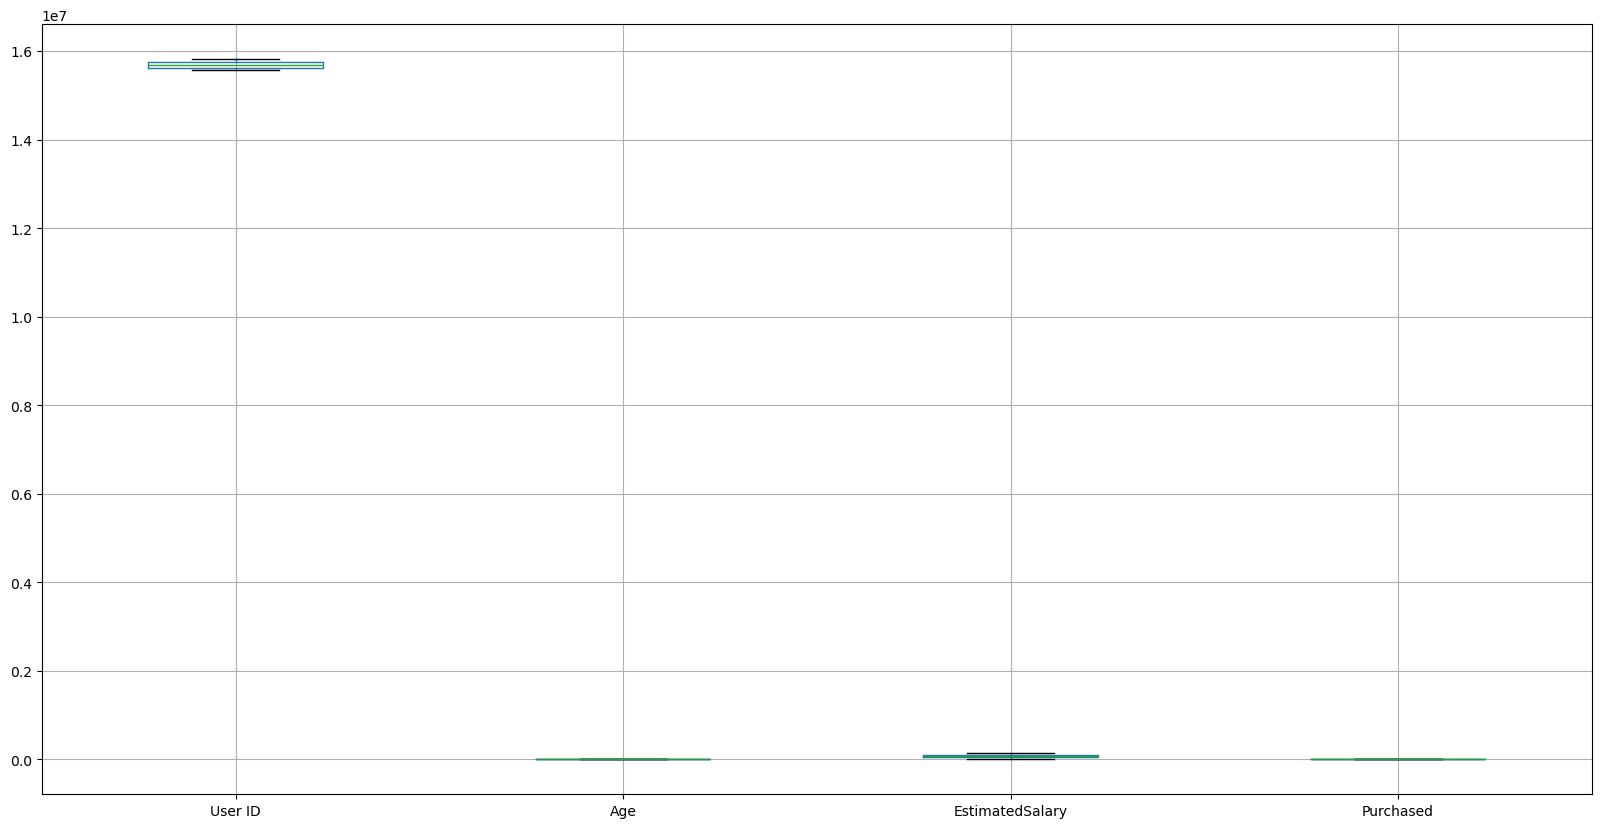

In [569]:
plt.figure(figsize=(20,10))
df.boxplot()

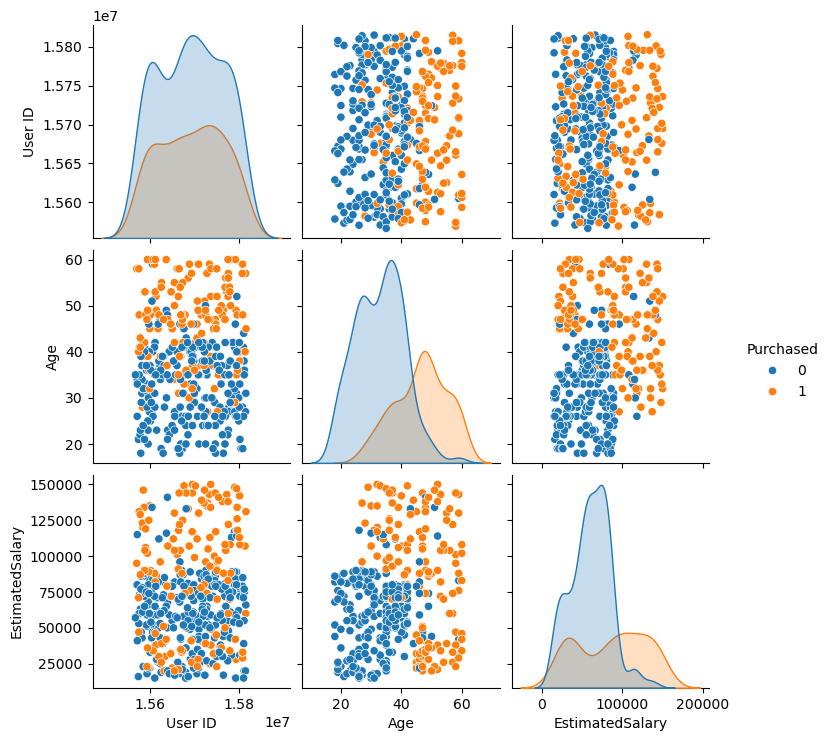

In [570]:
# sns.pairplot(data=df,hue='price')
sns.pairplot(data=df,hue='Purchased')
plt.show()

In [571]:
# x=df.drop(columns='price')
x=df.drop(columns='Purchased')
x=x.drop(columns='User ID')
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [572]:
# y=df['price']
y=df['Purchased']

In [573]:
from sklearn.preprocessing import StandardScaler

In [574]:
sc=StandardScaler()

In [575]:
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns,index=x.index)

<Axes: >

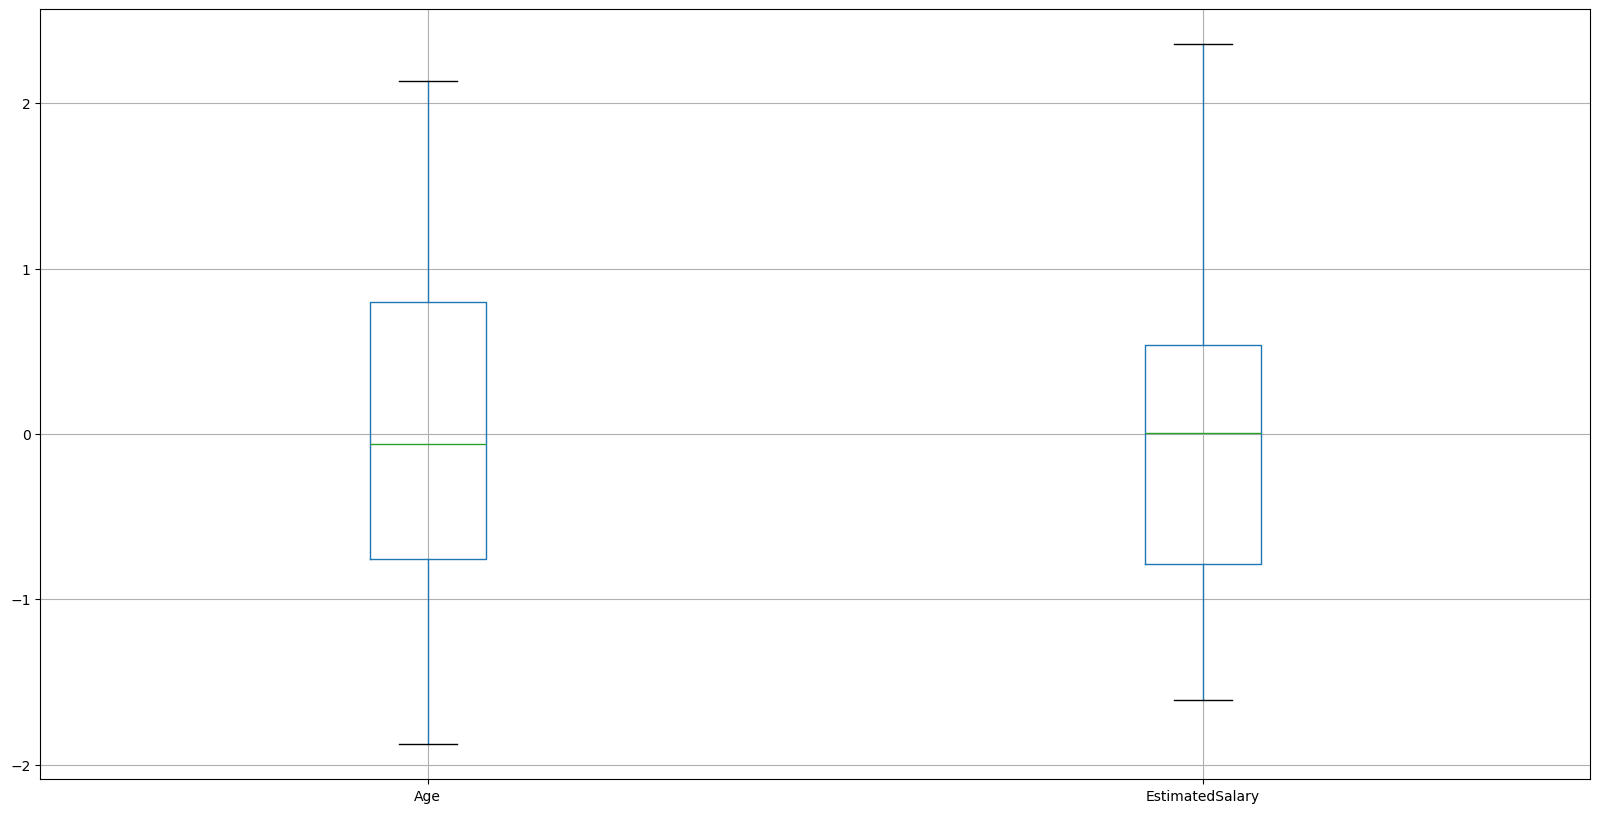

In [576]:
plt.figure(figsize=(20,10))
x.boxplot()

In [577]:
from sklearn.model_selection import train_test_split

In [578]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [579]:
from sklearn.linear_model import Perceptron

In [607]:
pr=Perceptron()

In [608]:
pr.fit(x_train,y_train)

Perceptron()

In [609]:
pr.score(x_test,y_test)

0.925

In [610]:
print('testing score :', pr.score(x_test,y_test), 'training score :', pr.score(x_train,y_train))

testing score : 0.925 training score : 0.809375


In [601]:
from mlxtend.plotting import plot_decision_regions

C:\Anaconda\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

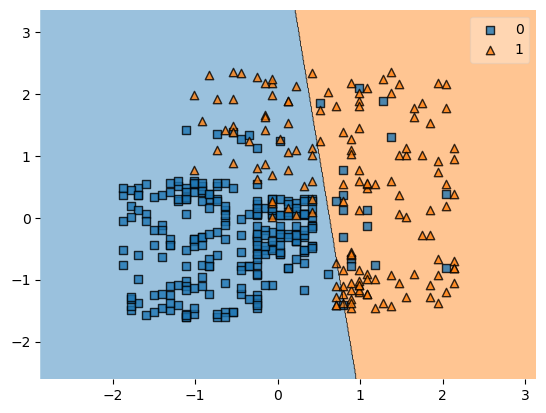

In [602]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=pr)

In [596]:
from sklearn.linear_model import LogisticRegression

In [597]:
lr=LogisticRegression()

In [598]:
lr.fit(x_train,y_train)

LogisticRegression()

In [599]:
lr.score(x_test,y_test)

0.8625

In [600]:
print('testing score :', lr.score(x_test,y_test), 'training score :', lr.score(x_train,y_train))

testing score : 0.8625 training score : 0.840625


C:\Anaconda\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

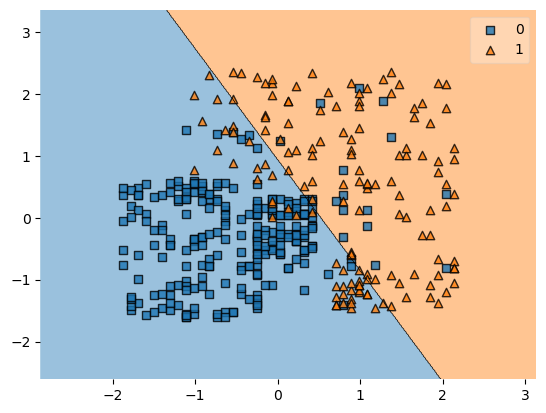

In [603]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=lr)